In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
#goto Anaconda then scripts then do pip install tensorflow==1.4.0 if it gives any error

6## Shallow And Deep Neural Network

In [5]:
from sklearn.datasets import make_moons

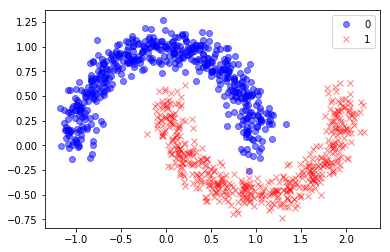

In [6]:
X,y=make_moons(n_samples=1000,noise=0.1,random_state=0)
plt.plot(X[y==0, 0], X[y==0,1],'ob',alpha=0.5)
plt.plot(X[y==1, 0], X[y==1,1],'xr',alpha=0.5)
plt.legend(['0','1'])

In [7]:
X

array([[ 2.04271531,  0.51812416],
       [ 1.72033708, -0.13233804],
       [-0.26386729,  0.76382643],
       ...,
       [ 0.33823662, -0.43099924],
       [ 0.1269428 ,  0.09966251],
       [ 0.54241537, -0.47450809]])

In [8]:
# 1000 data sets with two features represented by two dimension
X.shape

(1000, 2)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import SGD,Adam

Using TensorFlow backend.


## Shallow Model(Logistic Regression)

In [12]:
model=Sequential()
model.add(Dense(1,input_shape=(2,),activation='sigmoid'))
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=200,verbose=1)

Epoch 1/200
700/700 [==============================] - 0s 701us/step - loss: 1.1395 - acc: 0.2229
Epoch 2/200
700/700 [==============================] - 0s 138us/step - loss: 0.5978 - acc: 0.7443
Epoch 3/200
700/700 [==============================] - 0s 147us/step - loss: 0.3908 - acc: 0.8629
Epoch 4/200
700/700 [==============================] - 0s 163us/step - loss: 0.3257 - acc: 0.8686
Epoch 5/200
700/700 [==============================] - 0s 144us/step - loss: 0.2978 - acc: 0.8686
Epoch 6/200
700/700 [==============================] - 0s 138us/step - loss: 0.2801 - acc: 0.8729
Epoch 7/200
700/700 [==============================] - 0s 147us/step - loss: 0.2687 - acc: 0.8771
Epoch 8/200
700/700 [==============================] - 0s 153us/step - loss: 0.2594 - acc: 0.8757
Epoch 9/200
700/700 [==============================] - 0s 144us/step - loss: 0.2530 - acc: 0.8814
Epoch 10/200
700/700 [==============================] - 0s 145us/step - loss: 0.2470 - acc: 0.8814
Epoch 11/200
700/70

700/700 [==============================] - 0s 124us/step - loss: 0.2249 - acc: 0.8900
Epoch 84/200
700/700 [==============================] - 0s 137us/step - loss: 0.2241 - acc: 0.8886
Epoch 85/200
700/700 [==============================] - 0s 157us/step - loss: 0.2257 - acc: 0.8886
Epoch 86/200
700/700 [==============================] - 0s 136us/step - loss: 0.2248 - acc: 0.8900
Epoch 87/200
700/700 [==============================] - 0s 141us/step - loss: 0.2250 - acc: 0.8886
Epoch 88/200
700/700 [==============================] - 0s 144us/step - loss: 0.2246 - acc: 0.8871
Epoch 89/200
700/700 [==============================] - 0s 135us/step - loss: 0.2244 - acc: 0.8886
Epoch 90/200
700/700 [==============================] - 0s 133us/step - loss: 0.2245 - acc: 0.8900
Epoch 91/200
700/700 [==============================] - 0s 143us/step - loss: 0.2242 - acc: 0.8886
Epoch 92/200
700/700 [==============================] - 0s 150us/step - loss: 0.2266 - acc: 0.8886
Epoch 93/200
700/700 [=

700/700 [==============================] - 0s 124us/step - loss: 0.2248 - acc: 0.8900
Epoch 165/200
700/700 [==============================] - 0s 148us/step - loss: 0.2253 - acc: 0.8886
Epoch 166/200
700/700 [==============================] - 0s 144us/step - loss: 0.2252 - acc: 0.8871
Epoch 167/200
700/700 [==============================] - 0s 134us/step - loss: 0.2246 - acc: 0.8871
Epoch 168/200
700/700 [==============================] - 0s 144us/step - loss: 0.2252 - acc: 0.8886
Epoch 169/200
700/700 [==============================] - 0s 135us/step - loss: 0.2258 - acc: 0.8857
Epoch 170/200
700/700 [==============================] - 0s 134us/step - loss: 0.2260 - acc: 0.8857
Epoch 171/200
700/700 [==============================] - 0s 143us/step - loss: 0.2256 - acc: 0.8900
Epoch 172/200
700/700 [==============================] - 0s 140us/step - loss: 0.2247 - acc: 0.8871
Epoch 173/200
700/700 [==============================] - 0s 140us/step - loss: 0.2245 - acc: 0.8857
Epoch 174/200


In [14]:
results=model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 243us/step


In [15]:
results
#Binary cross Entropy and accuracy

[0.3157630676031113, 0.8366666674613953]

In [16]:
print("The Accuracy on the basis of training set is\t %.3f"%(results[1]))

The Accuracy on the basis of training set is	 0.837


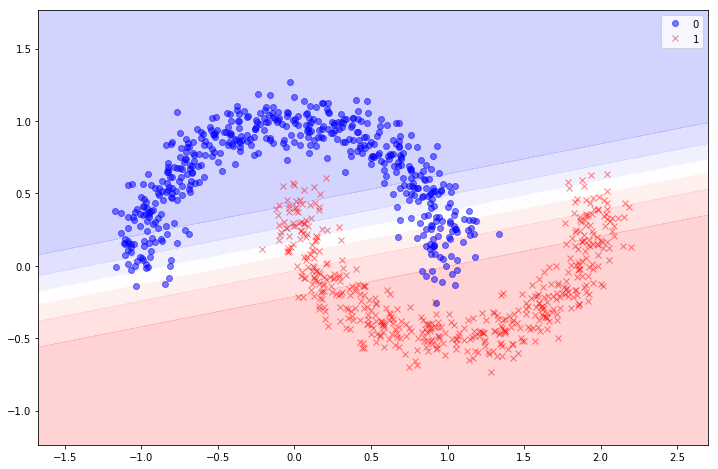

In [17]:
def plot_decision_boundary(model,X,y):
    amin,bmin=X.min(axis=0)-0.5 #amin bmin are min valyeb of axis points that appear on plots
    amax,bmax=X.max(axis=0)+0.5
    #print(amin,bmin)
    hticks=np.linspace(amin,amax,101)# Increase the value of 101 is like zooming in
    vticks=np.linspace(bmin,bmax,101)
    aa,bb=np.meshgrid(hticks,vticks)
    ab=np.c_[aa.ravel(),bb.ravel()]
    #x = np.array([[1, 2, 3], [4, 5, 6]])
    #print(np.ravel(x))
    #output will be [1 ,2,3,4,5,6]
    c=model.predict(ab)
    cc=c.reshape(aa.shape)
    
    plt.figure(figsize=(12,8))
    plt.contourf(aa,bb,cc,cmap='bwr',alpha=0.2)#increasing alpha value darkens the colour
    plt.plot(X[y==0,0], X[y==0,1],'ob',alpha=0.5)#increasing alpha value darkens volor of data points
    plt.plot(X[y==1,0], X[y==1,1],'xr',alpha=0.5)
    plt.legend(['0','1'])
plot_decision_boundary(model,X,y)

## DeepModel

In [18]:
model=Sequential()
model.add(Dense(4,input_shape=(2,),activation='tanh'))#4 nodes in first inner layer
model.add(Dense(2,activation='tanh'))#2 nodes in second inner layer
model.add(Dense(1,activation='sigmoid'))#1 nodes in third inner layer which is output 

model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(X_train,y_train,epochs=100,verbose=0)#verbose=1 will describe the value after each epoch
#change it to know more

In [20]:
model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 366us/step


[0.0063514862395823, 1.0]

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
y_train_pred=model.predict_classes(X_train)
y_test_pred=model.predict_classes(X_test)
print("The accuracy is %.3f"%(accuracy_score(y_train,y_train_pred)))
print("The accuracy is %.3f"%(accuracy_score(y_test,y_test_pred)))

The accuracy is 0.999
The accuracy is 1.000


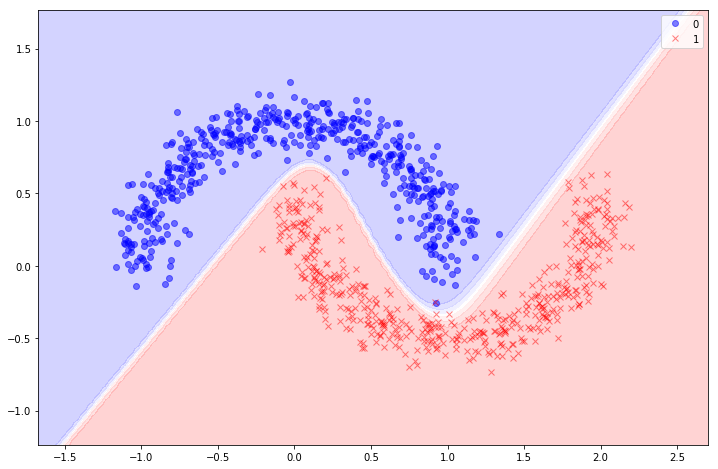

In [23]:
plot_decision_boundary(model,X,y)

## Multiclass Classification

In [24]:
from sklearn import datasets

In [25]:
df=pd.read_csv("Iris.csv",index_col="Id")

In [26]:
import seaborn as sns
#seaborn we can plot graph between everything vs everything

C:\Users\hp\Anaconda1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


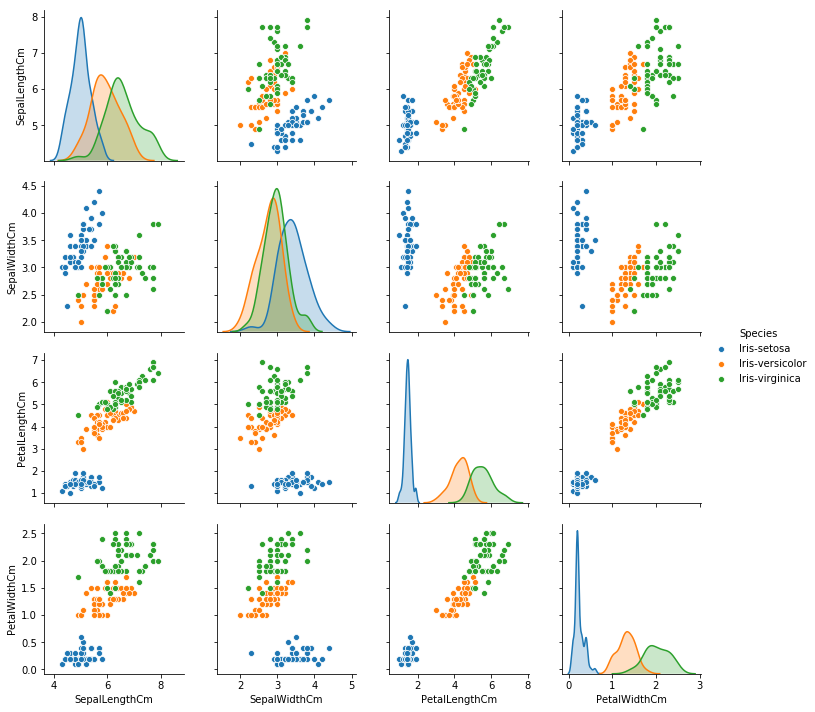

In [27]:

#sns.set(style="ticks", color_codes=True)
sns.pairplot(df,hue='Species')#hue is output label from data sets

In [28]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
x=df.drop('Species',axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [30]:
target_names=df['Species'].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
target_dict={n:i for i, n  in enumerate(target_names)}
target_dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [32]:
y=df['Species'].map(target_dict)
y.head()

Id
1    0
2    0
3    0
4    0
5    0
Name: Species, dtype: int64

In [33]:
from keras.utils.np_utils import to_categorical

In [34]:
y_cat=to_categorical(y)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(x.values,y_cat,test_size=0.2)

In [36]:
y_cat

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [40]:
#from keras import backend as K
from keras.layers import Activation
print(tf.__version__)
#print(keras.__version__)

1.4.0


In [41]:
model=Sequential()
model.add(Dense(3,input_shape=(4,)))#softmax problem can be resolved by chnaging versions of keras and tensorflow
#3 is output layer and 4 is no. of features
model.add(Activation(tf.nn.softmax))
model.compile(Adam(lr=0.1),'categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 0s 4ms/step - loss: 2.5491 - acc: 0.3704 - val_loss: 2.0001 - val_acc: 0.5833
Epoch 2/20
108/108 [==============================] - 0s 231us/step - loss: 1.6009 - acc: 0.6481 - val_loss: 1.0608 - val_acc: 0.5833
Epoch 3/20
108/108 [==============================] - 0s 222us/step - loss: 0.8816 - acc: 0.5648 - val_loss: 1.0545 - val_acc: 0.5833
Epoch 4/20
108/108 [==============================] - 0s 259us/step - loss: 0.8360 - acc: 0.6759 - val_loss: 0.6749 - val_acc: 0.5000
Epoch 5/20
108/108 [==============================] - 0s 240us/step - loss: 0.6694 - acc: 0.6296 - val_loss: 0.7056 - val_acc: 0.5833
Epoch 6/20
108/108 [==============================] - 0s 240us/step - loss: 0.5739 - acc: 0.6389 - val_loss: 0.6506 - val_acc: 0.5833
Epoch 7/20
108/108 [==============================] - 0s 203us/step - loss: 0.5300 - acc: 0.6759 - val_loss: 0.5171 - val_acc: 0.9167
Epoch 8/20
108/108 

In [43]:
y_pred=model.predict(X_test)

In [44]:
y_pred[:5]#probability of each element to be in each class

array([[3.0730816e-02, 6.3801283e-01, 3.3125636e-01],
       [9.8312736e-01, 1.6801642e-02, 7.1051189e-05],
       [2.3605376e-03, 4.8156181e-01, 5.1607758e-01],
       [9.9477392e-01, 5.2090269e-03, 1.7122438e-05],
       [1.1379499e-03, 3.0110273e-01, 6.9775927e-01]], dtype=float32)

In [45]:
y_test_class=np.argmax(y_test,axis=1)#taking the index of maximum values from above
y_pred_class=np.argmax(y_pred,axis=1)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test_class,y_pred_class))# classification report on test class and predicted class

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.90      0.90        10
           2       0.86      0.86      0.86         7

   micro avg       0.93      0.93      0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [48]:
confusion_matrix(y_test_class,y_pred_class)# 13 elements were in class 1 in test set and they were predicted to be in class 1, 9 in class 2 and predicted to bve in class 2, whereas 1 in class 2 and predicted to be class 3

array([[13,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  6]], dtype=int64)

In [51]:
#x.values